In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Code sử dụng thư viện 

## load data

In [2]:
customer_data = pd.read_csv('data.csv')
customer_data.shape

(200, 5)

In [3]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Chia cột “Age” thành 10 nhóm khác nhau $(15-20,20-30,30-40,40-50,50-60,60-70)$

In [6]:
intervals = [12, 20, 30, 40, 50, 60, 70]
col = customer_data['Age']
customer_data['Age Groups'] = pd.cut(x=col, bins=intervals)
customer_data['Age Groups']

0      (12, 20]
1      (20, 30]
2      (12, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(12, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [7]:
customer_data.groupby('Age Groups')['Age Groups'].count()

C:\Users\PC\AppData\Local\Temp\ipykernel_12700\1439608483.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_data.groupby('Age Groups')['Age Groups'].count()


Age Groups
(12, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Age Groups, dtype: int64

### Chuyển 2 cột Age và Genre thành dạng số

In [8]:
customer_data_oh = pd.get_dummies(customer_data)
customer_data_oh

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age Groups_(12, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,19,15,39,False,True,True,False,False,False,False,False
1,2,21,15,81,False,True,False,True,False,False,False,False
2,3,20,16,6,True,False,True,False,False,False,False,False
3,4,23,16,77,True,False,False,True,False,False,False,False
4,5,31,17,40,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,True,False,False,False,True,False,False,False
196,197,45,126,28,True,False,False,False,False,True,False,False
197,198,32,126,74,False,True,False,False,True,False,False,False
198,199,32,137,18,False,True,False,False,True,False,False,False


### Bỏ cột “CustomerID”

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

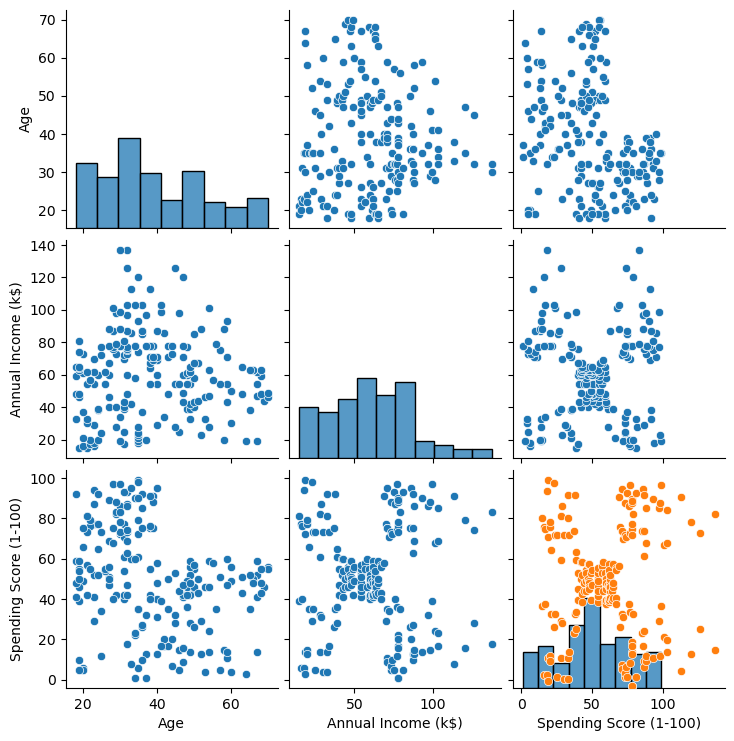

In [9]:
customer_data = customer_data.drop('CustomerID', axis=1, inplace = False)
sns.pairplot(customer_data)
sns.scatterplot(x=customer_data['Annual Income (k$)'],
                y=customer_data['Spending Score (1-100)'])

### Bỏ cột “Age” và vẽ dendrogram

In [10]:
customer_data_oh = customer_data_oh.drop(['Age'], axis = 1)
customer_data_oh.shape

(200, 11)

In [11]:
customer_data_oh

,CustomerID,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age Groups_(12, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,15,39,False,True,True,False,False,False,False,False
1,2,15,81,False,True,False,True,False,False,False,False
2,3,16,6,True,False,True,False,False,False,False,False
3,4,16,77,True,False,False,True,False,False,False,False
4,5,17,40,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
195,196,120,79,True,False,False,False,True,False,False,False
196,197,126,28,True,False,False,False,False,True,False,False
197,198,126,74,False,True,False,False,True,False,False,False
198,199,137,18,False,True,False,False,True,False,False,False


#### Method = 'ward'

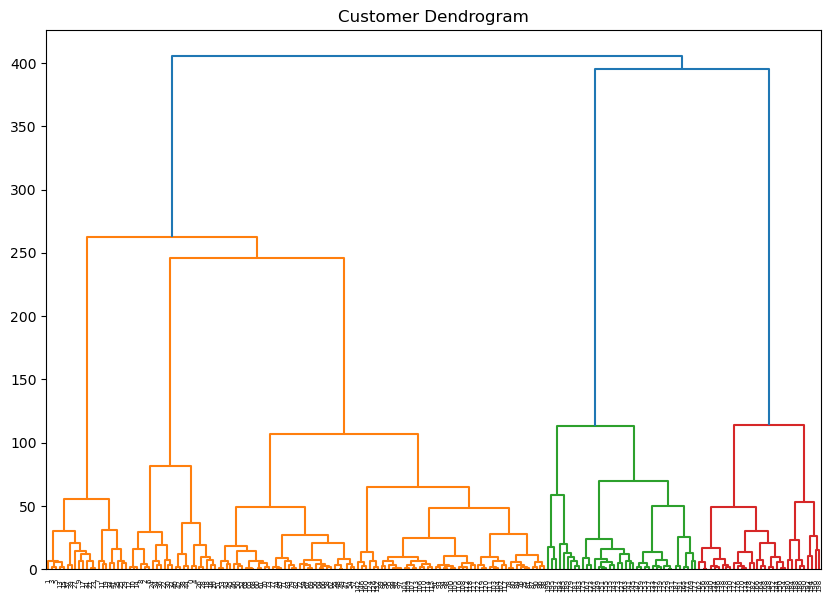

In [12]:
plt.figure(figsize=(10, 7))
plt.title('Customer Dendrogram')
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, method='ward', metric='euclidean')
shc.dendrogram(Z=clusters)
plt.show()

### Vẽ đường nằm ngang đi qua khoảng cách dài nhất

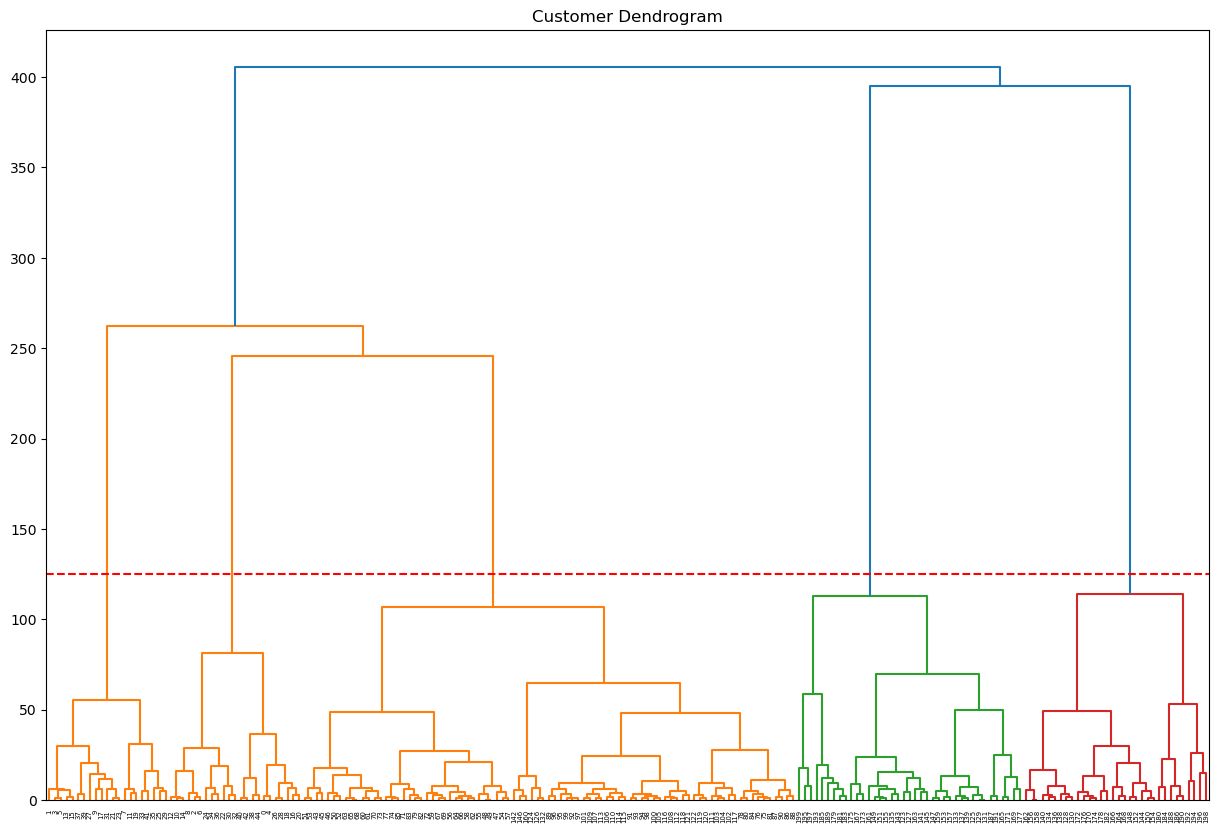

In [13]:
plt.figure(figsize=(15, 10))
plt.title('Customer Dendrogram')
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, method='ward', metric='euclidean')
shc.dendrogram(Z=clusters)
plt.axhline(y = 125, color = 'r', linestyle = '--')
plt.show()

### Thực thi phân cụm với dữ liệu ban đầu

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


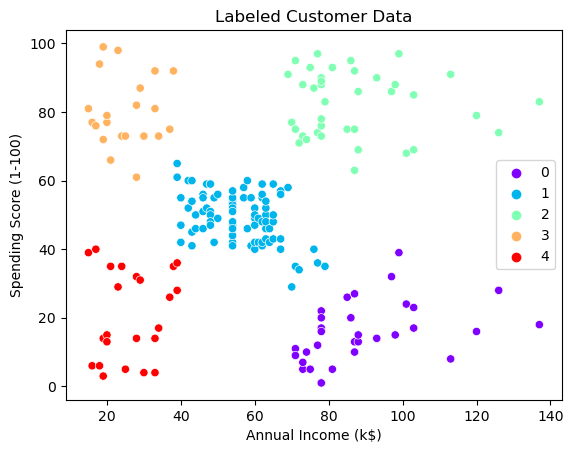

In [14]:
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
data_labels = clustering_model.labels_
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=selected_data, hue=data_labels, palette='rainbow')
plt.title('Labeled Customer Data')
plt.show()

#### Method = 'single-linkage' 

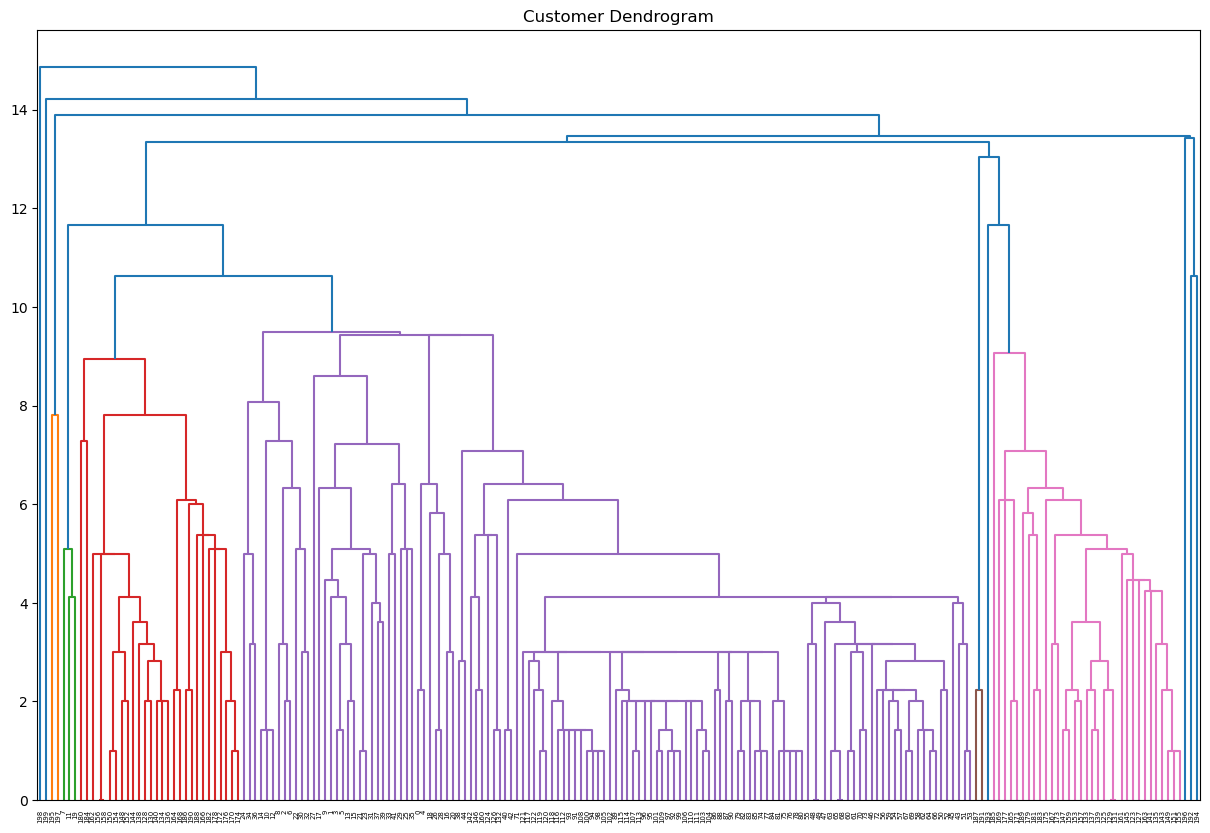

In [15]:
plt.figure(figsize=(15, 10))
plt.title('Customer Dendrogram')
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, method='single', metric='euclidean')
shc.dendrogram(Z=clusters)
plt.show()

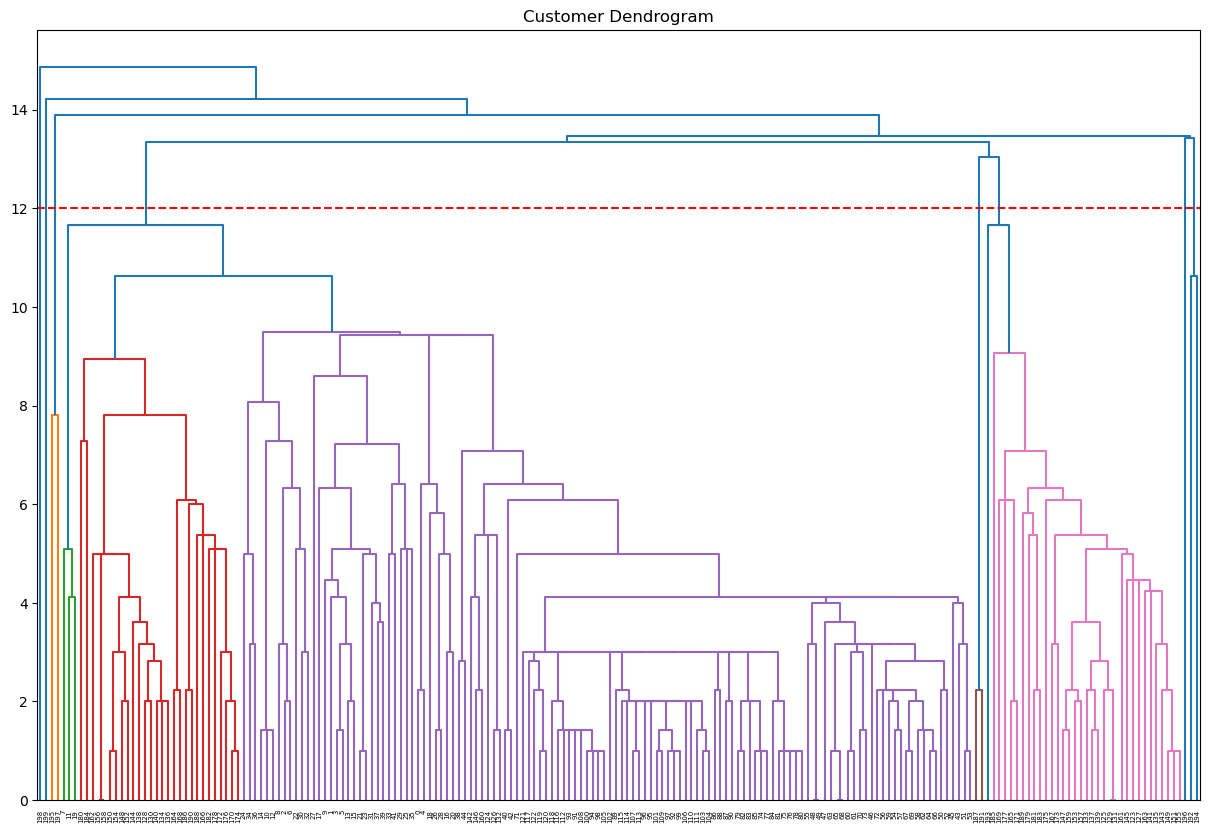

In [16]:
plt.figure(figsize=(15, 10))
plt.title('Customer Dendrogram')
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, method='single', metric='euclidean')
shc.dendrogram(Z=clusters)
plt.axhline(y = 12, color = 'r', linestyle = '--')
plt.show()

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


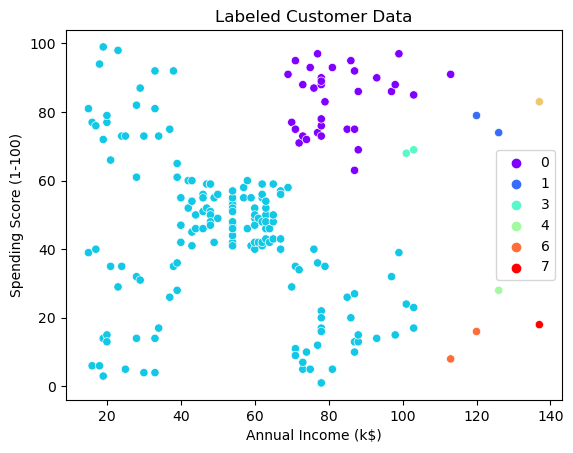

In [17]:
clustering_model = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='single')
clustering_model.fit(selected_data)
data_labels = clustering_model.labels_
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=selected_data, hue=data_labels, palette='rainbow')
plt.title('Labeled Customer Data')
plt.show()

#### Method = 'complete-linkage'

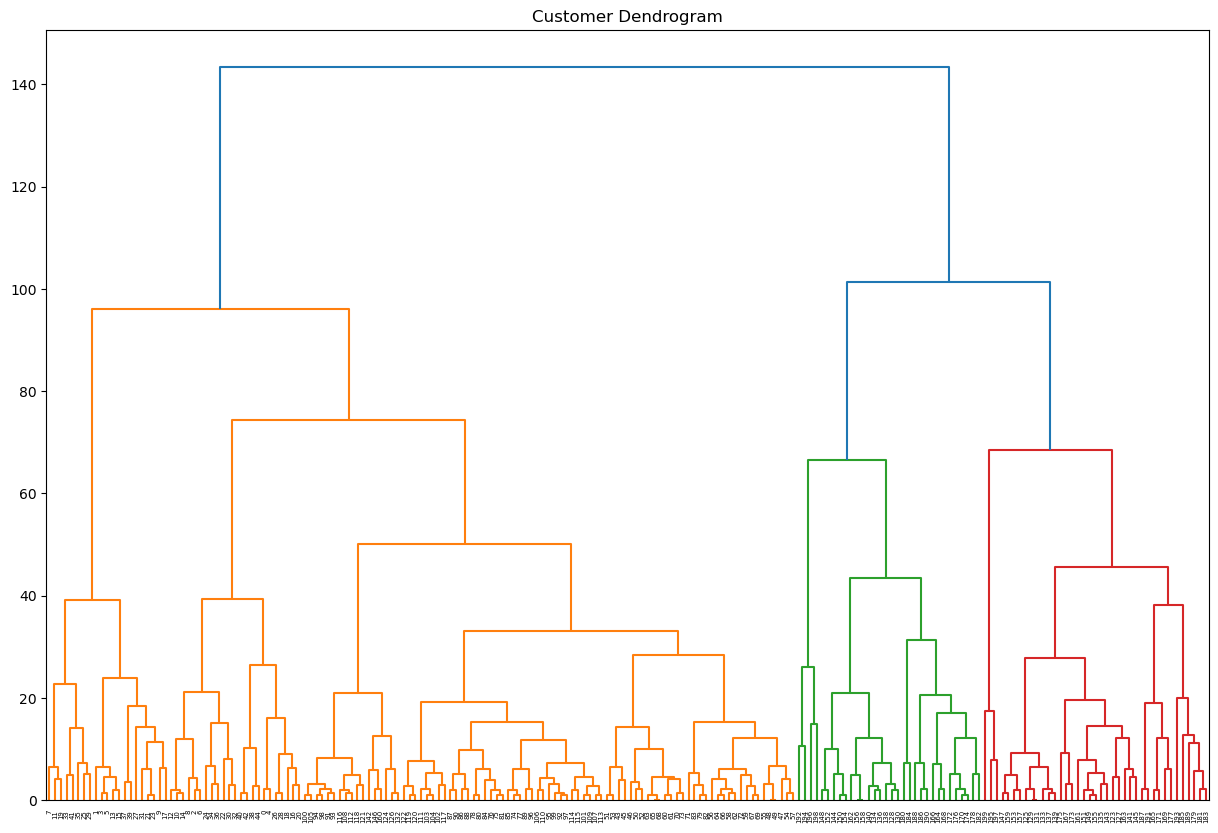

In [18]:
plt.figure(figsize=(15, 10))
plt.title('Customer Dendrogram')
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, method='complete', metric='euclidean')
shc.dendrogram(Z=clusters)
plt.show()

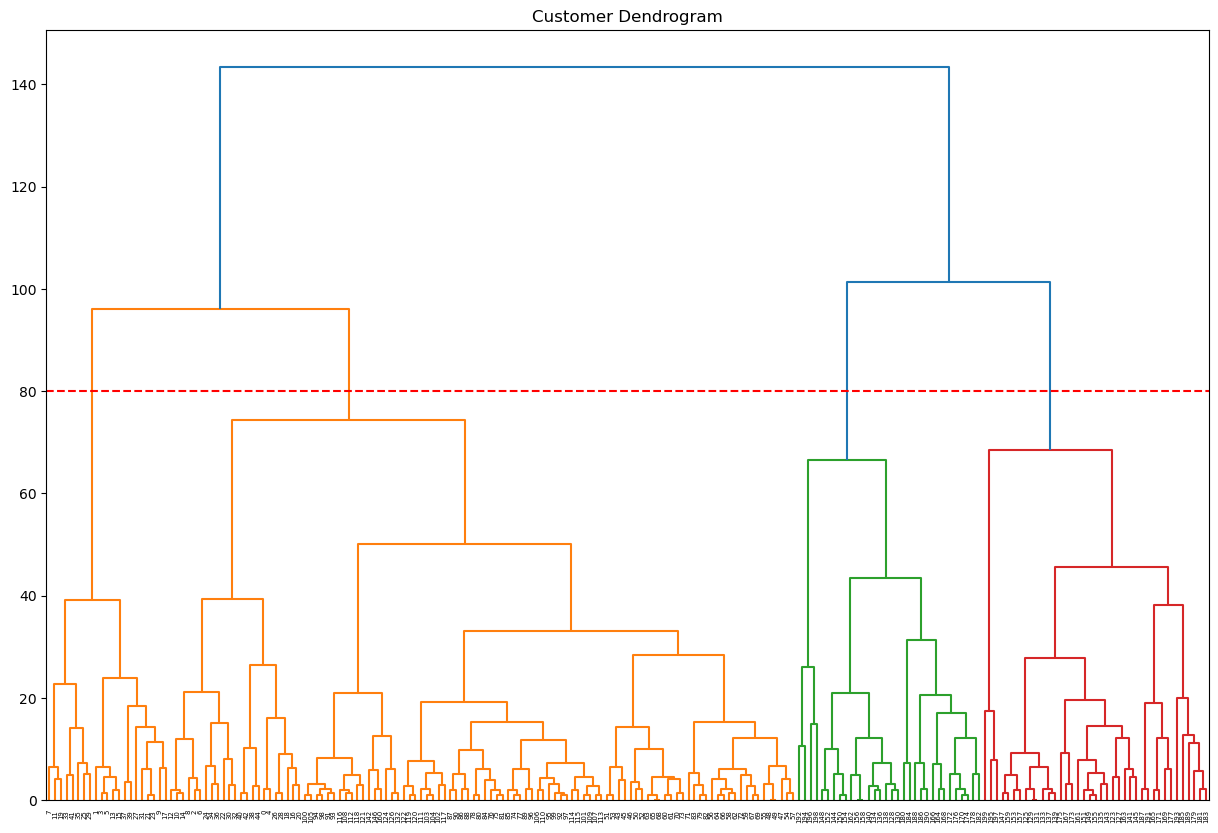

In [19]:
plt.figure(figsize=(15, 10))
plt.title('Customer Dendrogram')
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, method='complete', metric='euclidean')
shc.dendrogram(Z=clusters)
plt.axhline(y = 80, color = 'r', linestyle = '--')
plt.show()

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


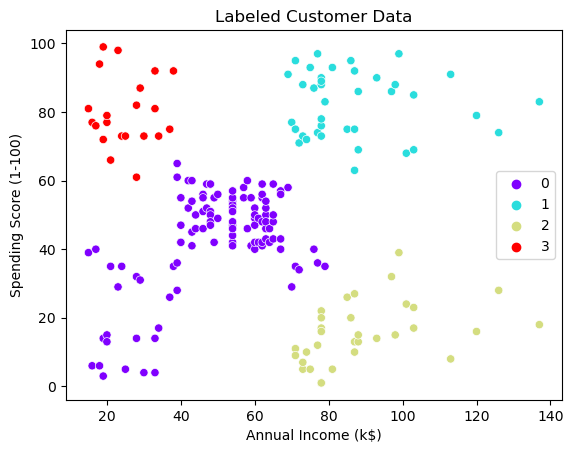

In [20]:
clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clustering_model.fit(selected_data)
data_labels = clustering_model.labels_
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=selected_data, hue=data_labels, palette='rainbow')
plt.title('Labeled Customer Data')
plt.show()

#### Method = 'average-linkage'

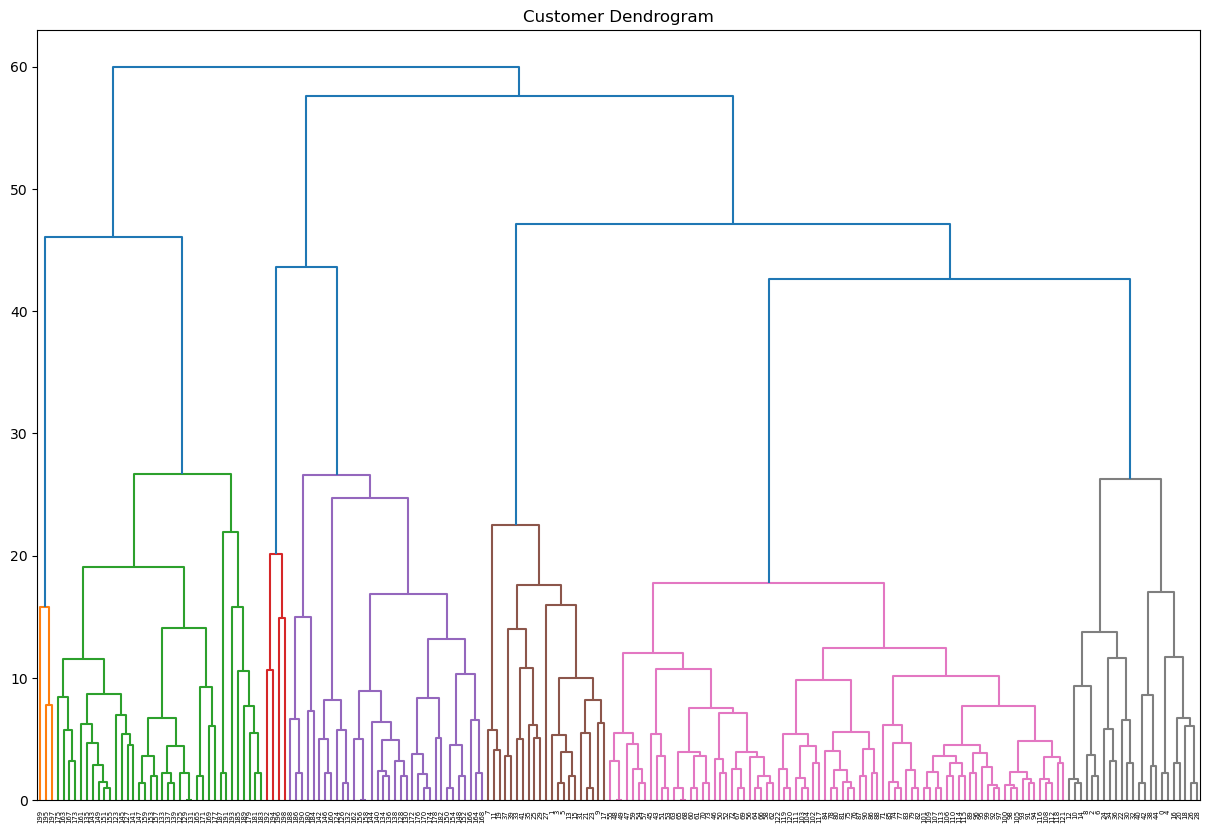

In [21]:
plt.figure(figsize=(15, 10))
plt.title('Customer Dendrogram')
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, method='average', metric='euclidean')
shc.dendrogram(Z=clusters)
plt.show()

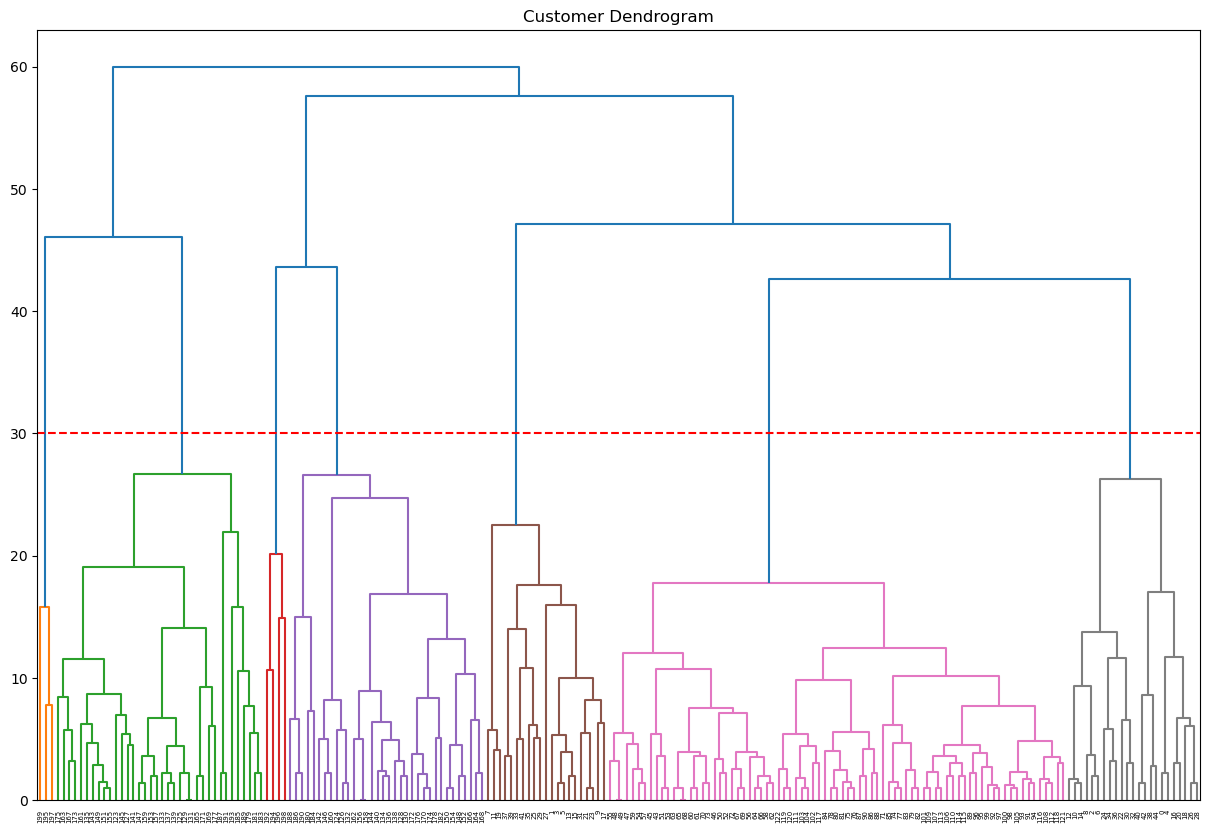

In [22]:
plt.figure(figsize=(15, 10))
plt.title('Customer Dendrogram')
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, method='average', metric='euclidean')
shc.dendrogram(Z=clusters)
plt.axhline(y = 30, color = 'r', linestyle = '--')
plt.show()

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


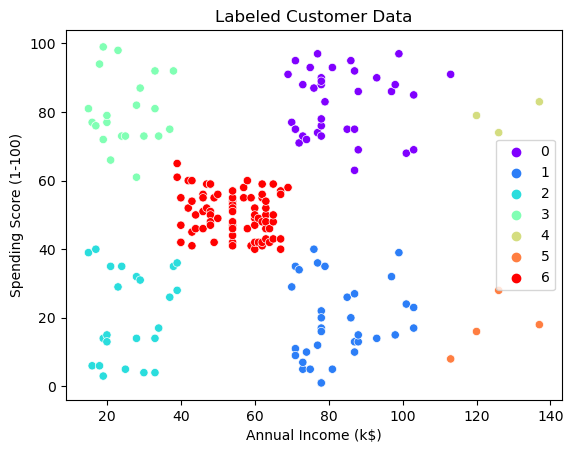

In [23]:
clustering_model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')
clustering_model.fit(selected_data)
data_labels = clustering_model.labels_
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=selected_data, hue=data_labels, palette='rainbow')
plt.title('Labeled Customer Data')
plt.show()

# Code không sử dụng thư viện

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
import sys
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [25]:
data = np.array(selected_data.values)
print(data)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

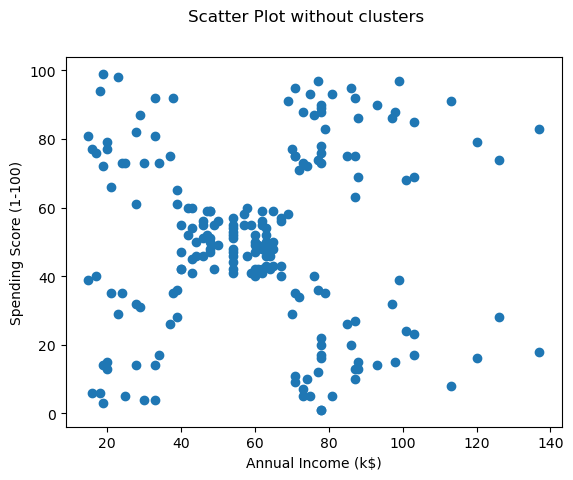

In [26]:
fig = plt.figure()
fig.suptitle('Scatter Plot without clusters')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.scatter(data[:,0],data[:,1])

In [27]:
def find_clusters(input,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    

    for n in range(input.shape[0]):
        array.append(n)
        
    clusters[0] = array.copy()

    #finding minimum value from the distance matrix
    #note that this loop will always return minimum value from bottom triangle of matrix
    for k in range(1, input.shape[0]):
        min_val = sys.maxsize
        
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j
                    
        #once we find the minimum value, we need to update the distance matrix
        #updating the matrix by calculating the new distances from the cluster to all points
        
        #for Single Linkage
        if(linkage == "Single" or linkage =="single"):
            for i in range(0,input.shape[0]):
                if(i != col_index):
                    #we calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp = min(input[col_index][i],input[row_index][i])
                    #we update the matrix symmetrically as our distance matrix should always be symmetric
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Complete Linkage
        elif(linkage=="Complete" or linkage == "complete"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = max(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Average Linkage
        elif(linkage=="Average" or linkage == "average"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i != row_index):
                    temp = (input[col_index][i]+input[row_index][i])/2
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        
                   
        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        #Set input[row_index][for_all_i] = infinity
        #set input[for_all_i][row_index] = infinity
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize
            
        #Manipulating the dictionary to keep track of cluster formation in each step
        #if k=0,then all datapoints are clusters
       
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()
        
    return clusters

In [28]:
def hierarchical_clustering(data, linkage, no_of_clusters):  
    #first step is to calculate the initial distance matrix
    #it consists distances from all the point to all the point
    rainbow_palette = plt.get_cmap('rainbow')
    initial_distances = pairwise_distances(data, metric='euclidean')
    #making all the diagonal elements infinity 
    np.fill_diagonal(initial_distances,sys.maxsize)
    clusters = find_clusters(initial_distances,linkage) 
    
    #plotting the clusters
    iteration_number = initial_distances.shape[0] - no_of_clusters
    clusters_to_plot = clusters[iteration_number]
    arr = np.unique(clusters_to_plot)
    
    indices_to_plot = []
    fig = plt.figure()
    fig.suptitle('Labeled Customer Data')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Spending Score (1-100)')
    for x in np.nditer(arr):
        indices_to_plot.append(np.where(clusters_to_plot==x))
    p = 0
    
    for i in range(0, len(indices_to_plot)):
        for j in np.nditer(indices_to_plot[i]):
            scatter = ax.scatter(x = data[j,0],y = data[j,1], c=rainbow_palette(p/len(arr)))
        p = p + 1
        
    plt.show()

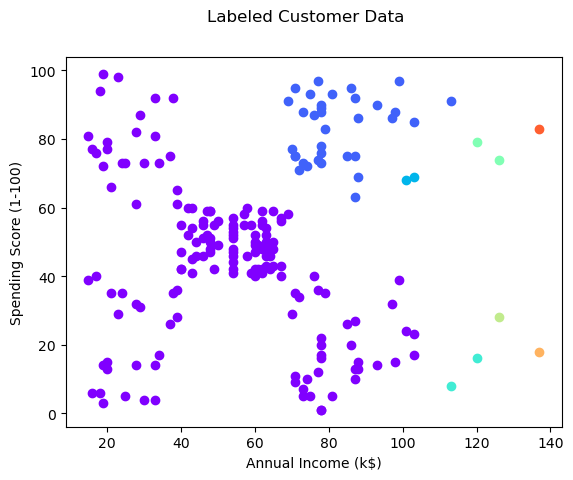

In [29]:
single_linkage = hierarchical_clustering(data = data, linkage = "single", no_of_clusters = 8)

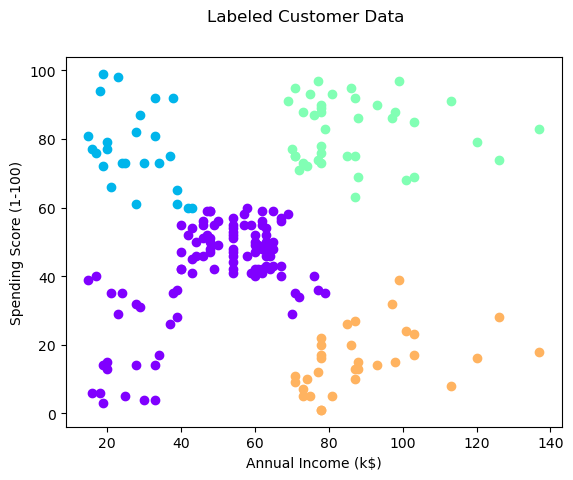

In [30]:
complete_linkage = hierarchical_clustering(data = data, linkage = "complete", no_of_clusters = 4)

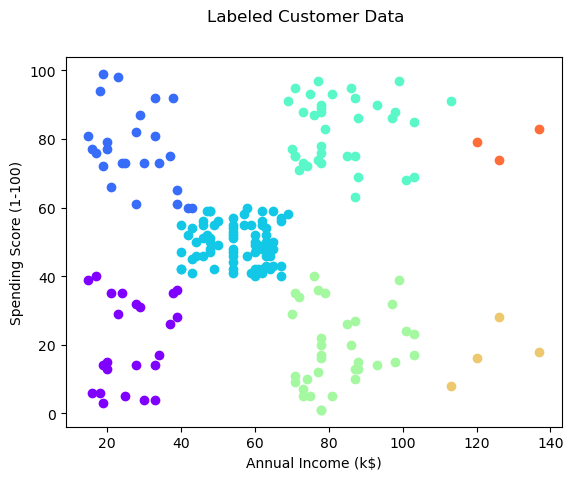

In [31]:
average_linkage = hierarchical_clustering(data = data, linkage = "average", no_of_clusters = 7)